# SWAHILI NEWS CLASSIFICATION

In [19]:
# Load the dataset

# Will clean the train dataset and test the model with the test dataset

import pandas as pd
import numpy as np

In [20]:
# Load the dataset

news = pd.read_csv('datasets/Train.csv')
news.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


## Data Cleaning & EDA

In [21]:
# Will remove the id column

news = news.drop(columns=['id'], axis=1)
news.head()

,content,category
0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [22]:
# Number of rows and columns
news.shape

(5151, 2)

<AxesSubplot:xlabel='category', ylabel='count'>

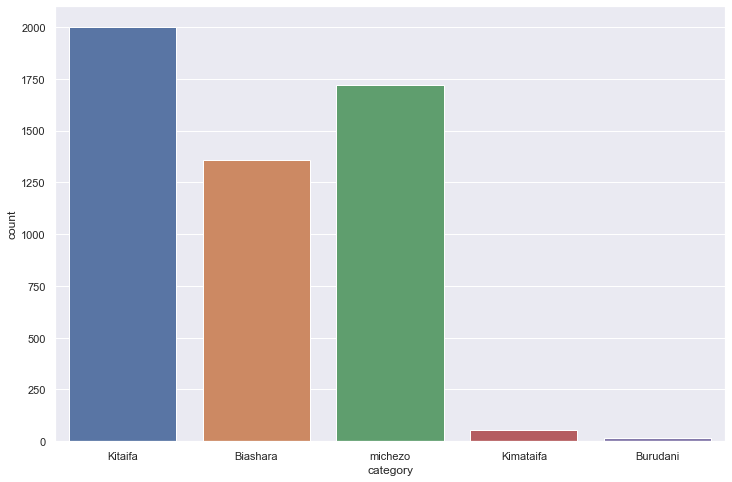

In [23]:
# Will vizualize the most common type of news category
import seaborn as sns
sns.set(rc = {'figure.figsize':(12, 8)})
sns.countplot(x = news['category'])

Due to lack of data, will only be predicting news articles in 'kitaifa', 'biashara' and 'michezo' categories

In [24]:
# Drop rows with values of 'kimataifa' and 'burudani'

categories = ['Kimataifa', 'Burudani']

news = news[news.category.isin(categories) == False]

news.head()

,content,category
0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [25]:
news.shape

(5080, 2)

about 70 rows of data were dropped, which will be sufficient for our project

# NLP Preprocessing

#### Steps : 

- Lowercase
- Stopwords (will define them as they are in swahili)
- tokenization (splitting the sentenses into individual text)
- Removing punctuation marks


TBD

## 1. Change text to Lowercase

In [26]:
news['new'] = news['content'].str.lower()
news.head()

,content,category,new
0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani...
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,"mkuu wa mkoa wa tabora, aggrey mwanri amesiti..."
2,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita kwa taasisi zote z...
3,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni ya mchezo wa kubahatisha ya m-bet ime...
4,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu...


## 2. Removing stopwords

In [27]:
stopwords_swahili = ['akasema', 'alikuwa', 'alisema', 'baada', 'basi','bila', 'cha', 'chini', 'hadi', 'hapo', 'hata','hivyo', 'hiyo', 'huku', 'huo', 'ili',
'ilikuwa', 'juu', 'kama', 'karibu', 'katika', 'kila ', 'kima', 'kisha', 'kubwa', 'kutoka', 'kuwa', 'kwa', 'kwamba', 'kwenda', 'kwenye', 'la', 'lakini', 'mara',
'mdogo', 'mimi', 'mkubwa', 'mmoja', 'moja', 'muda', 'mwenye', 'na', 'naye', 'ndani', 'ng', 'ni', 'nini', 'pamoja', 'pia', 'sana', 'sasa', 'sauti', 'tafadhali', 'tena',
'tu', 'ule', 'vile', 'wa', 'wakati', 'wake', 'walikuwa', 'wao', 'watu', 'wengine', 'wote', 'ya', 'yake', 'yangu', 'yao', 'yeye', 'yule', 'za', 'zaidi', 'zake']
stopwords_swahili

['akasema',
 'alikuwa',
 'alisema',
 'baada',
 'basi',
 'bila',
 'cha',
 'chini',
 'hadi',
 'hapo',
 'hata',
 'hivyo',
 'hiyo',
 'huku',
 'huo',
 'ili',
 'ilikuwa',
 'juu',
 'kama',
 'karibu',
 'katika',
 'kila ',
 'kima',
 'kisha',
 'kubwa',
 'kutoka',
 'kuwa',
 'kwa',
 'kwamba',
 'kwenda',
 'kwenye',
 'la',
 'lakini',
 'mara',
 'mdogo',
 'mimi',
 'mkubwa',
 'mmoja',
 'moja',
 'muda',
 'mwenye',
 'na',
 'naye',
 'ndani',
 'ng',
 'ni',
 'nini',
 'pamoja',
 'pia',
 'sana',
 'sasa',
 'sauti',
 'tafadhali',
 'tena',
 'tu',
 'ule',
 'vile',
 'wa',
 'wakati',
 'wake',
 'walikuwa',
 'wao',
 'watu',
 'wengine',
 'wote',
 'ya',
 'yake',
 'yangu',
 'yao',
 'yeye',
 'yule',
 'za',
 'zaidi',
 'zake']

In [28]:
# Every word in that array should be removed in the column

# Will create a function that iterates through the text, removing present stopwords

def swahili_stops(text):
    no_stops = " ".join([word for word in text.split() if word not in stopwords_swahili])
    return no_stops

In [29]:
# Test
eg = 'ule mtu fulani amekaa kando ya kiti juu ya meza'

swahili_stops(eg)

'mtu fulani amekaa kando kiti meza'

In [32]:
news['new'] = news['new'].apply(lambda text : swahili_stops(text))
news['new']

0       serikali imesema haitakuwa tayari kuona amani ...
1       mkuu mkoa tabora, aggrey mwanri amesitisha lik...
2       serikali imetoa miezi sita taasisi zote umma a...
3       kampuni mchezo kubahatisha m-bet imeingia maku...
4       watanzania wamekumbushwa kusherehekea sikukuu ...
                              ...                        
5146    rais john magufuli ameendelea kung’ara siasa k...
5147    kampeni inayohimiza watafi ti kuandika upya hi...
5148    matukio mapya malaria kila 1,000 jamii, yamepu...
5149    imeelezwa hakuna sheria yoyote inayokataza taa...
5150    akizungumza kutiwa saini makubaliano hayo jana...
Name: new, Length: 5080, dtype: object

## 3. Tokenization

In [33]:
# Will import the natural language library which will help in tokenization
import nltk

tokenizer = nltk.word_tokenize

In [34]:
news['tokenized'] = news['new'].apply(tokenizer)
news.head()

,content,category,new,tokenized
0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,serikali imesema haitakuwa tayari kuona amani ...,"[serikali, imesema, haitakuwa, tayari, kuona, ..."
1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,"mkuu mkoa tabora, aggrey mwanri amesitisha lik...","[mkuu, mkoa, tabora, ,, aggrey, mwanri, amesit..."
2,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,serikali imetoa miezi sita taasisi zote umma a...,"[serikali, imetoa, miezi, sita, taasisi, zote,..."
3,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,kampuni mchezo kubahatisha m-bet imeingia maku...,"[kampuni, mchezo, kubahatisha, m-bet, imeingia..."
4,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,watanzania wamekumbushwa kusherehekea sikukuu ...,"[watanzania, wamekumbushwa, kusherehekea, siku..."
